# Arrest Rate in the United States, by state
Source: FBI, https://ucr.fbi.gov/crime-in-the-u.s/2018/crime-in-the-u.s.-2018/topic-pages/tables/table-69
- Data for Iowa are from 2019 (all the other data are from 2018)
- Population size are from 2018 US census: https://www.census.gov/newsroom/press-kits/2018/pop-estimates-national-state.html

In [14]:
import pandas as pd
from pathlib import Path
import sys
import matplotlib.pyplot as plt

# Import local modules
sys.path.append("../Local_Modules/")
import codebook

In [5]:
csv = Path('../raw_data/FBI_2018_crimeByStates.csv')
arrests_df = pd.read_csv(csv)

In [11]:
# Change state name with 2-letter state code
for key in codebook.codes_states.keys():
    arrests_df.loc[arrests_df['State']==key,'State'] = codebook.codes_states[key]

# Delete empty rows
arrests_df = arrests_df.dropna(how='any')

# Recalculate Rate
arrests_df['Rate'] = 100*arrests_df['Arrests']/arrests_df['Population']

arrests_df.head()

,State,Arrests,Population,Rate
0,AL,126404.0,4887871.0,2.586075
1,AK,30620.0,737438.0,4.152213
2,AZ,256785.0,7171646.0,3.580559
3,AR,120240.0,3013825.0,3.989615
4,CA,1093080.0,39557045.0,2.763300


Text(0, 0.5, 'Arrest Rate %')

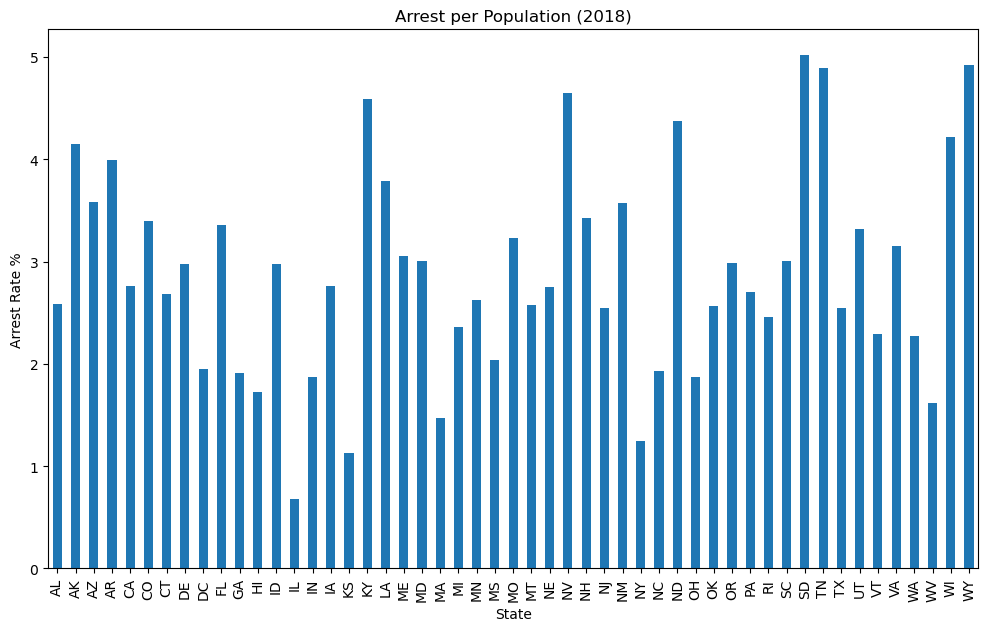

In [17]:
arrests_df.plot.bar(x='State',y='Rate', figsize=(12,7),legend=False)
plt.title('Arrest per Population (2018)')
plt.ylabel('Arrest Rate %')